## Task Mate Kenyan Sign Language Classification Challenge:

This my notebook for the **Task Mate Kenyan Sign Language Classification** [Zindi Competition](https://zindi.africa/competitions/kenyan-sign-language-classification-challenge)

Table of contents:

1. [Introduction](#Introduction)
2. [Data Overview](#Data-Overview)
3. [Import Modules](#Import)
4. [Data Exploration](#Data-Exploration)

## 1. Introduction <a class="anchor" id="Introduction"></a>

#### **Kenyan Sign Language:**
Kenyan Sign Language (English: KSL, Swahili: LAK) is a sign language used by the deaf community in Kenya and Somalia. It is used by over half of Kenya's estimated 600,000 deaf population. There are some dialect differences between Kisumu (western Kenya), Mombasa (eastern Kenya) and Somalia. (See Somali Sign Language.)  
Source: [Kenyan Sign Language - Wikipedia](https://en.wikipedia.org/wiki/Kenyan_Sign_Language)

#### **Goal:**
Building a model to recognise nine different everyday KSL signs present in the images

## 2. Data Overview <a class="anchor" id="Data-Overview"></a>

The dataset provided consists of:
- train.csv: Containing two columns:
  - img_IDS: Image id linking to the corresponding JPG file in the images folder
  - label: One of the nine KSL signs the model will be trained to predict
- test.csv: Containing the test set image ids
- SampleSubmission.csv: example submission file with ten columns:
  - The first column is the image ids
  - The nine other columns correspond to the nine KSL signs

## 3. Importing Modules <a class="anchor" id="Import"></a>

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img

## 4. Data Exploration <a class="anchor" id="Data-Exploration"></a>

We first load the datasets and take a look at the number of images we have.

In [2]:
IMAGE_DIR='./Data/Images/Images/'
print(f'The total number of images is: {len(os.listdir(IMAGE_DIR))}')

The total number of images is: 8928


In [3]:
train_data = pd.read_csv("./Data/Train.csv")
test_data = pd.read_csv("./Data/Test.csv")
sample_submission = pd.read_csv('./Data/SampleSubmission.csv')

In [4]:
train_data.head()

,img_IDS,Label
0,ImageID_33HMDMJ3,Temple
1,ImageID_V5POEX4O,Church
2,ImageID_89CCCCW6,Enough/Satisfied
3,ImageID_GNJXOWX5,Me
4,ImageID_7Q9LOP7R,Love


In [5]:
test_data.head()

,img_IDS
0,ImageID_USRB8QNG
1,ImageID_SZ8D1ZJI
2,ImageID_4OJO2F8J
3,ImageID_IEE4XV0B
4,ImageID_BP0O0WZ9


In [6]:
sample_submission.head()

,img_IDS,Church,Enough/Satisfied,Friend,Love,Me,Mosque,Seat,Temple,You
0,ImageID_USRB8QNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ImageID_SZ8D1ZJI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ImageID_4OJO2F8J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ImageID_IEE4XV0B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ImageID_BP0O0WZ9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train_data.shape, test_data.shape, sample_submission.shape

((6249, 2), (2679, 1), (2679, 10))

Let's see the different KSL signs we have:

In [8]:
signs=sorted(np.unique(train_data.Label))
signs

['Church',
 'Enough/Satisfied',
 'Friend',
 'Love',
 'Me',
 'Mosque',
 'Seat',
 'Temple',
 'You']

How many images are there for each sign in the train set?

In [9]:
train_images_per_label = pd.value_counts(train_data['Label'])
train_images_per_label

Enough/Satisfied    695
Mosque              695
Seat                695
Temple              694
Church              694
Me                  694
Love                694
You                 694
Friend              694
Name: Label, dtype: int64

We can see we have a balanced dataset.  


To get a sense of the data, we can take a look at a picture from each label

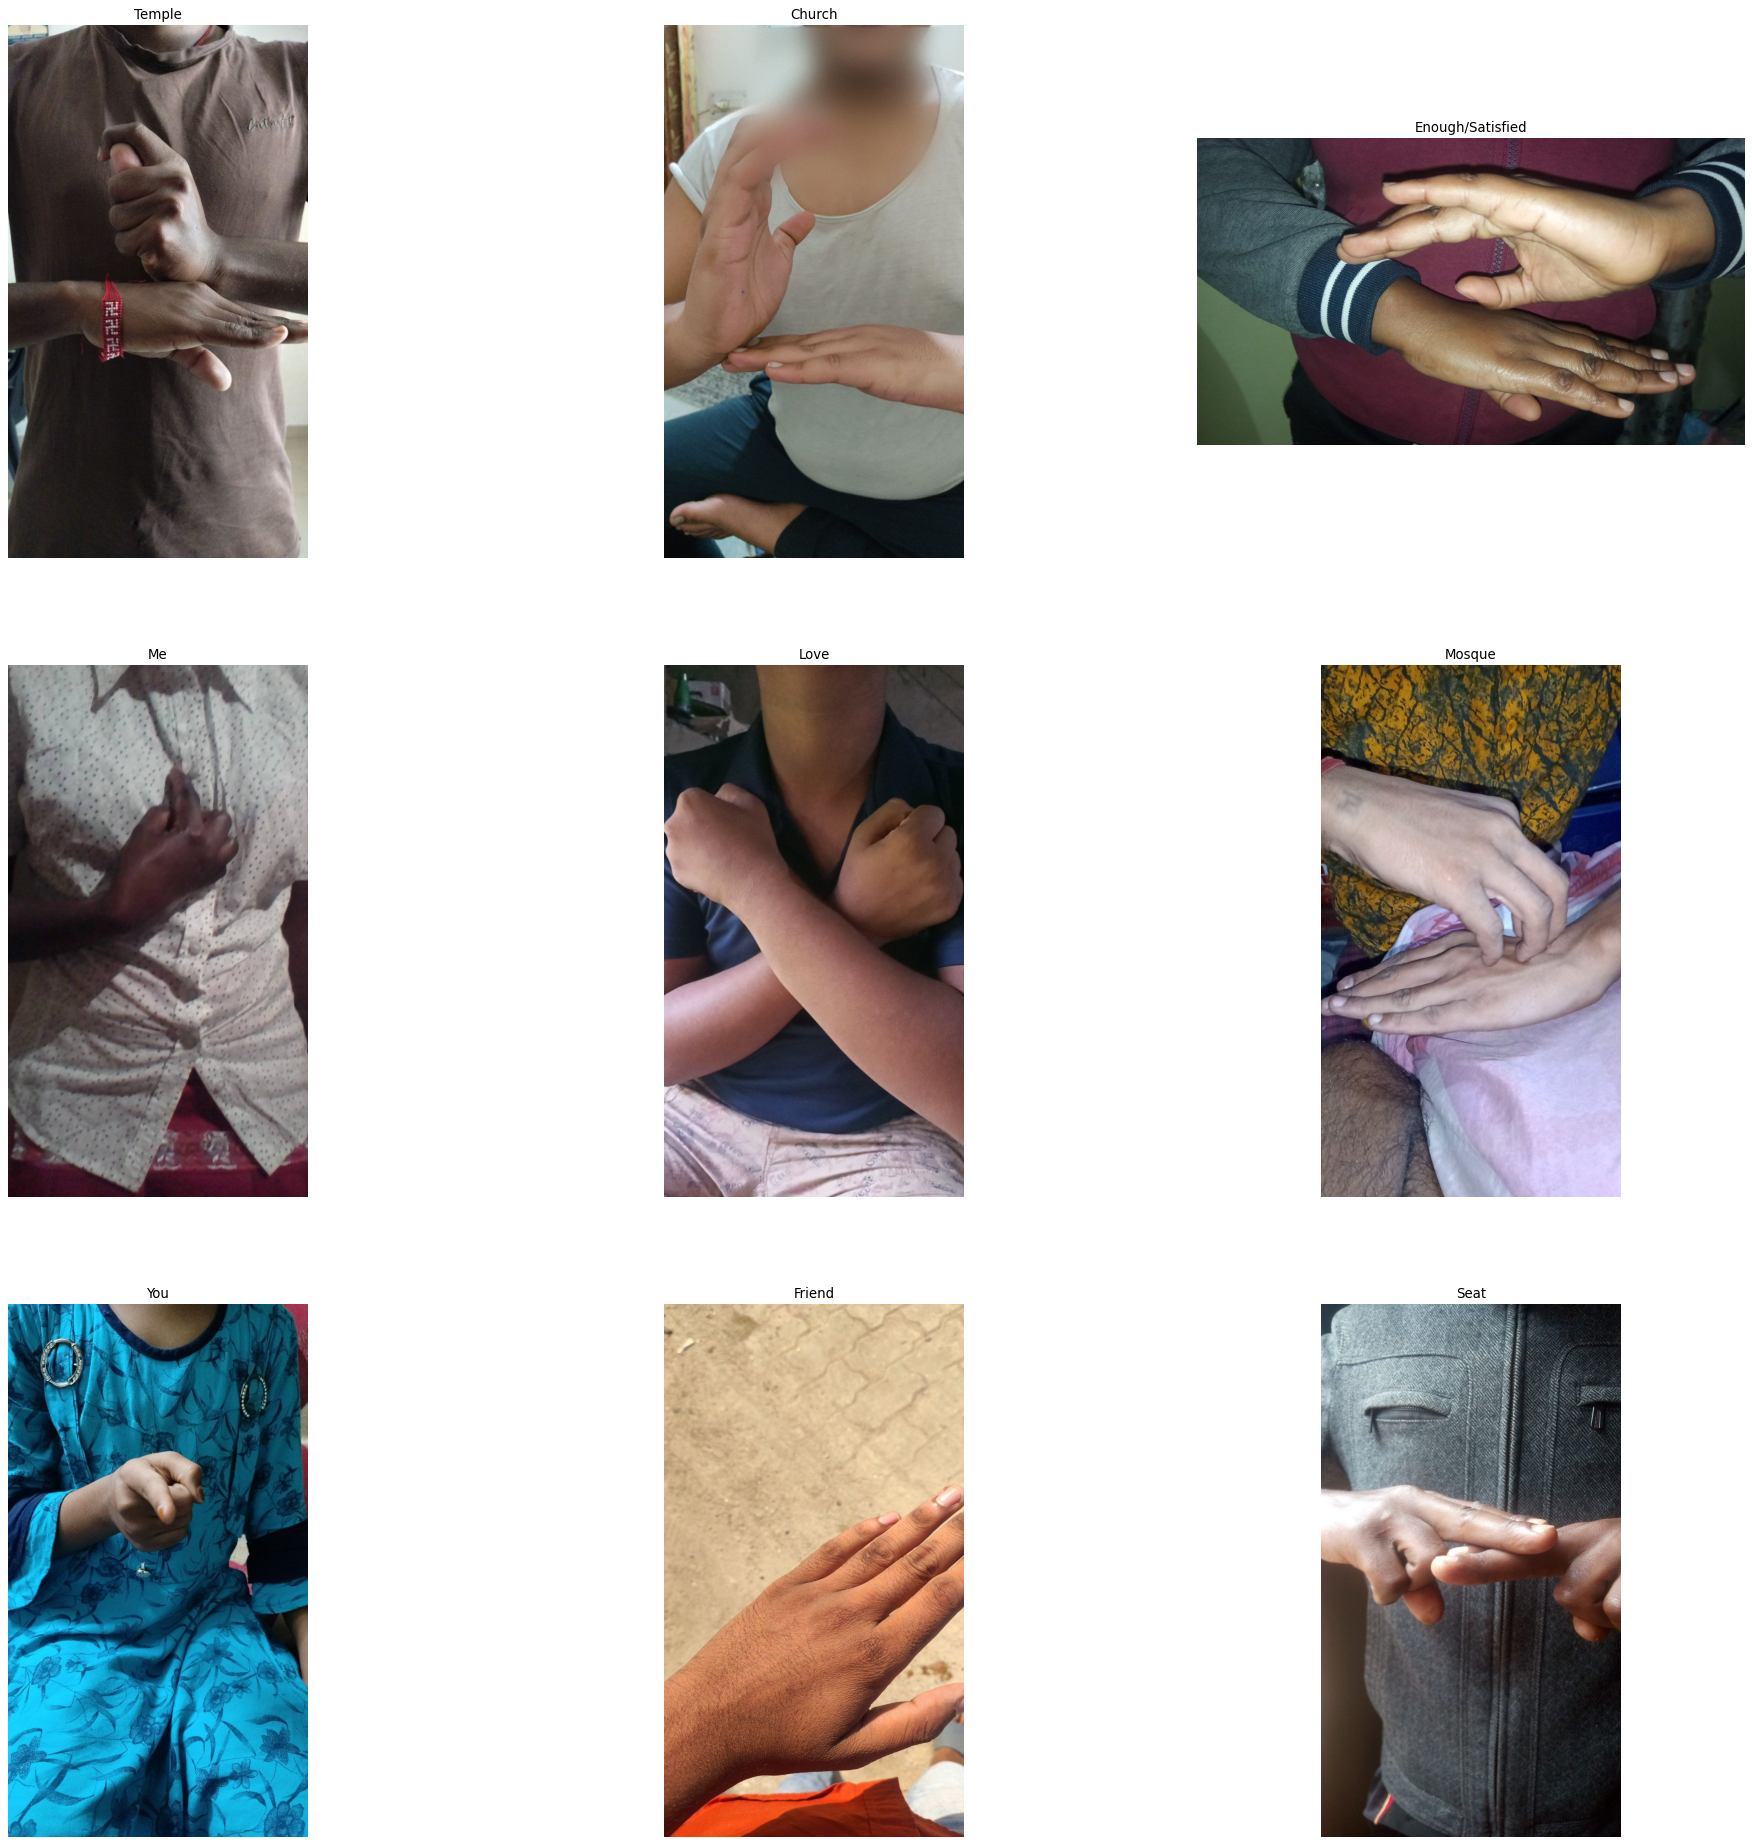

In [10]:
plt.figure(figsize=(30, 30), dpi=80)
pictures=[0,1,2,3,4,9,10,19,36]
for idx,pic in enumerate(pictures):
    subplot=plt.subplot(3, 3, idx+1)
    subplot.set_title(train_data['Label'][pic])
    image=img.imread(IMAGE_DIR+train_data['img_IDS'][pic]+'.jpg')
    plt.imshow(image)
    plt.axis('off')

We can already see that images don't have the same size.  
Let's create two mappings:
 - Labels: From KSL signs to integer labels
 - Label_lookup: integer labels to KSL signs

In [19]:
labels = dict(zip(signs, np.arange(len(signs))))
label_lookup = {v: k for k, v in labels.items()}
num_classes = len(labels)

In [37]:
image_files = [os.path.join(IMAGE_DIR, f) for f in os.listdir(IMAGE_DIR) 
              if f.split('.')[0] in train_data.img_IDS.values]
#image_to_sign = dict(zip(train_data.img_IDS, train_data.Label))
#image_ids = [os.path.basename(f).split('.')[0] for f in image_files]
#image_sign_ids = [image_to_sign[id] for id in image_ids]